### Data Description

Key Features in the Dataset:





Key Features and Additional Variables

Rating

Description: The numerical rating given by customers for the product.

Type: Integer

Scale: Typically ranges from 1 to 5, with higher ratings indicating greater satisfaction.



Date

Description: The date when the review was posted.

Type: Date

Format: Usually in the format 'DD-MMM-YY' (e.g., '31-Jul-18').



Variation

Description: The specific variation or finish of the Alexa device reviewed.

Type: Categorical

Examples: 'Charcoal Fabric', 'Walnut Finish', etc.



Verified Reviews

Description: The text of the review provided by customers.

Type: Text

Purpose: Used for sentiment analysis and extracting detailed customer opinions.



Feedback

Description: A binary indicator showing whether the review was deemed helpful by other users.

Type: Binary (0 or 1)

Values:

1: Review marked as helpful

0: Review not marked as helpful



Additional Variables

Review Length

Description: The length of the review text.

Type: Integer

Purpose: Can be used to analyze the correlation between review length and rating or feedback helpfulness.



Word Count

Description: The number of words in the review text.

Type: Integer

Purpose: Useful for text analysis and understanding the verbosity of reviews.



Sentiment Score

Description: A derived feature indicating the sentiment polarity of the review text (e.g., positive, negative, neutral).

Type: Float or Categorical

Purpose: Summarizes the overall sentiment of the review for further analysis.



Output Variable



Predicted Sentiment (or Satisfaction)

Description: The predicted sentiment or satisfaction level based on the review text and other features.

Type: Categorical (e.g., Positive, Negative, Neutral) or Integer (e.g., 1-5 for ratings)

Purpose: This is the target variable for predictive models aiming to classify sentiment or predict customer satisfaction levels.

### Mount the data

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
sns.set_palette("bright")

### Uploading the Original Dataset

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/amazon_alexa.tsv", sep=r"\t")
df


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1


This is the original data set of amazon alexa reviews from kaggle wesite.

### Adding Additional Data

In [6]:
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/additional_data.csv")
df2

,rating,date,variation,verified_reviews,feedback
0,2,14-Jan-20,Charcoal Fabric,The connection keeps dropping frequently. Very...,0
1,1,15-Jan-20,Walnut Finish,Terrible sound quality and very slow response ...,0
2,1,16-Jan-20,Heather Gray,Stopped working after a month. Customer servic...,0
3,2,17-Jan-20,Sandstone,Voice recognition is poor. Alexa struggles to ...,0
4,1,18-Jan-20,Charcoal Fabric,Device overheats after prolonged use. Unsafe a...,0
...,...,...,...,...,...
1225,2,23-May-23,Heather Gray,Too many limitations on what it can do.,0
1226,1,24-May-23,Sandstone Fabric,Stopped working after a few months.,0
1227,2,25-May-23,Charcoal Fabric,Voice recognition is very poor.,0
1228,1,26-May-23,Walnut Finish,Doesn't understand my voice commands.,0


We then uploaded 1500 entries of madeup negative reviews for amazon alexa.

### Combining the dataset

In [7]:
# # Union the DataFrames
data = pd.concat([df,df2],ignore_index=True)

We merged both the datasets to balance the data.

In [8]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


###Balance the data

In [9]:
# filter the data with rating = 5

rating_5 = data[data["rating"] == 5]

We then filtered rows with 5 rating to filter the positive values.

In [10]:
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
4375,2,23-May-23,Heather Gray,Too many limitations on what it can do.,0
4376,1,24-May-23,Sandstone Fabric,Stopped working after a few months.,0
4377,2,25-May-23,Charcoal Fabric,Voice recognition is very poor.,0
4378,1,26-May-23,Walnut Finish,Doesn't understand my voice commands.,0


In [11]:
len(rating_5)

2286

In [12]:
index_random_1000 = rating_5.sample(n=1000, random_state=42).index

data.drop(index_random_1000,inplace=True)

We dropped 100 entriees with rating = 5 so that we can make the dataset more balanced.

In [13]:
len(rating_5)

2286

In [14]:
data.reset_index(inplace=True)

we reset the index as we added and dropped values, we need to reindex the new dataset we have now.

In [15]:
data.drop(columns=['index'],inplace=True)

<Axes: ylabel='count'>

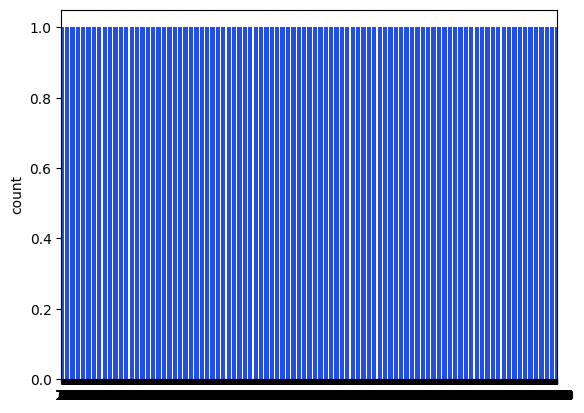

In [16]:
sns.countplot(data['feedback'])

### Data Understanding

In [17]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [18]:
data['rating'].unique()

array([5, 4, 3, 2, 1])

In [19]:
type(data['date'][0]) , data['date'][0]

(str, '31-Jul-18')

In [20]:
data['date'] = pd.to_datetime(data['date'])
data['date'][0]

Timestamp('2018-07-31 00:00:00')

Here we converted the date from string to  timestamp for further analysis

In [21]:
dates = data['date']
only_dates = []
for date in dates:
    only_dates.append(date.date())

data['only_dates'] = only_dates
data['only_dates'][0]

datetime.date(2018, 7, 31)

In [22]:
only_year = []
for date in dates:
    only_year.append(date.year)
data['year'] = only_year


only_month = []
for date in dates:
    only_month.append(date.month)
data['month'] = only_month

# 1 -> monday
# 7 -> sunday
only_weekday = []
for date in dates:
    only_weekday.append(date.isoweekday())
data['day_of_week'] = only_weekday

we seperated year, months, and days of the week

In [23]:
# Ensure all entries in 'verified_reviews' are strings
data['verified_reviews'] = data['verified_reviews'].astype(str)

# Compute the length of each review
data['len_of_reviews'] = data['verified_reviews'].apply(len)


In [24]:
reviews = data['verified_reviews']
len_review = []
for review in reviews:
    len_review.append(len(review))

data['len_of_reviews'] = len_review

we are calculating length of the reviews here for our sentimental analysis

In [25]:
data['len_of_reviews'][0], data['verified_reviews'][0]

(13, 'Love my Echo!')

In [26]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback',
       'only_dates', 'year', 'month', 'day_of_week', 'len_of_reviews'],
      dtype='object')

### Visualizations

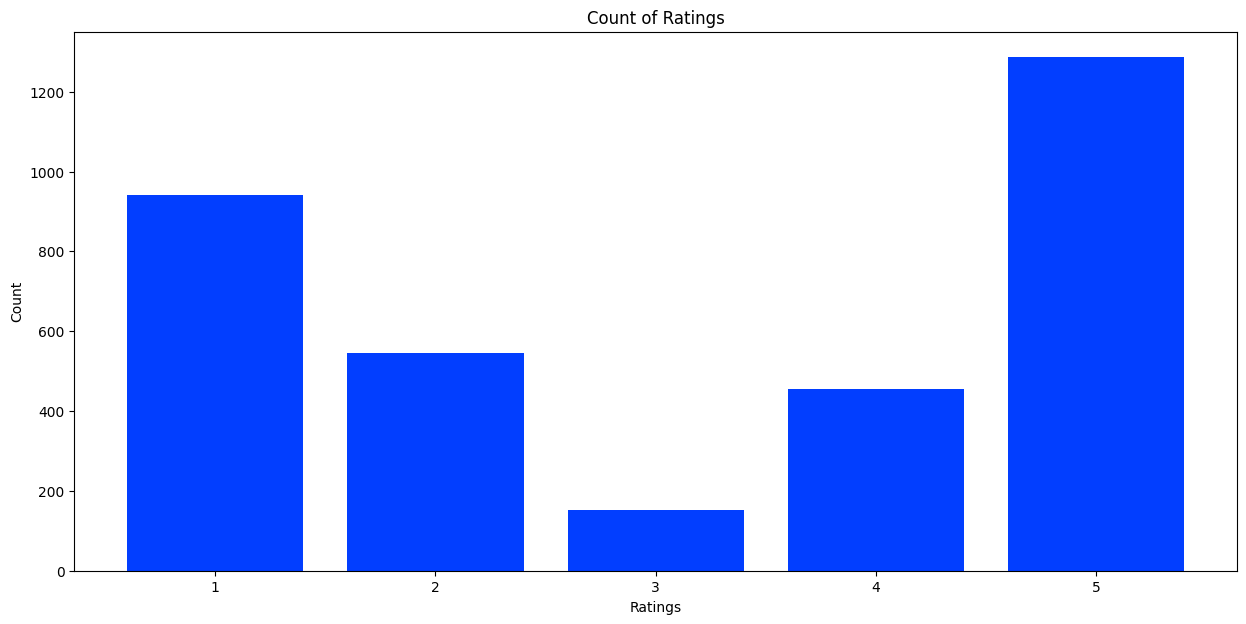

In [27]:
plt.figure(figsize=(15,7))
plt.bar(height = data.groupby('rating').count()['date'], x = sorted(data['rating'].unique(), reverse= False))
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Count of Ratings")
plt.show()

The sentiment analysis of the Alexa review dataset reveals a high degree of consumer satisfaction, as shown by the vast amount of 5-star ratings. This shows that people are typically satisfied with Alexa products, owing to their favorable experiences with the device's performance, dependability, and user-friendly design. The high frequency of top ratings indicates widespread customer approval, which is critical for sustaining a strong market position and cultivating brand loyalty. This positive feedback can lead to repeat purchases and positive word-of-mouth, enhancing the product's long-term success.

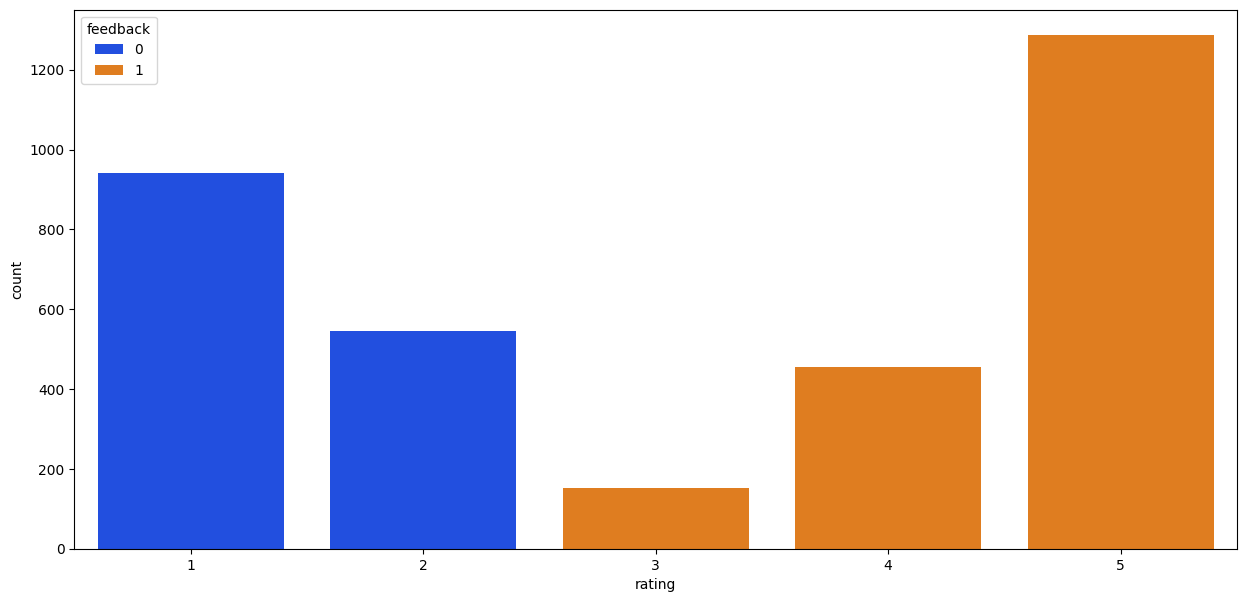

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(x="rating", hue="feedback", data=data)
plt.show()

By applying a hue of feedback to our research, we can see that evaluations with ratings greater than 2 typically receive favorable feedback (marked as 1). This substantial link implies that rating scores can significantly influence sentiment classification. However, to ensure that our learning algorithm develops a more nuanced view of sentiment without depending too much on rating scores, we will remove the rating column from the training data set. This strategy seeks to prevent the algorithm from exploiting this trait, resulting in a more thorough analysis of the linguistic content in the reviews.

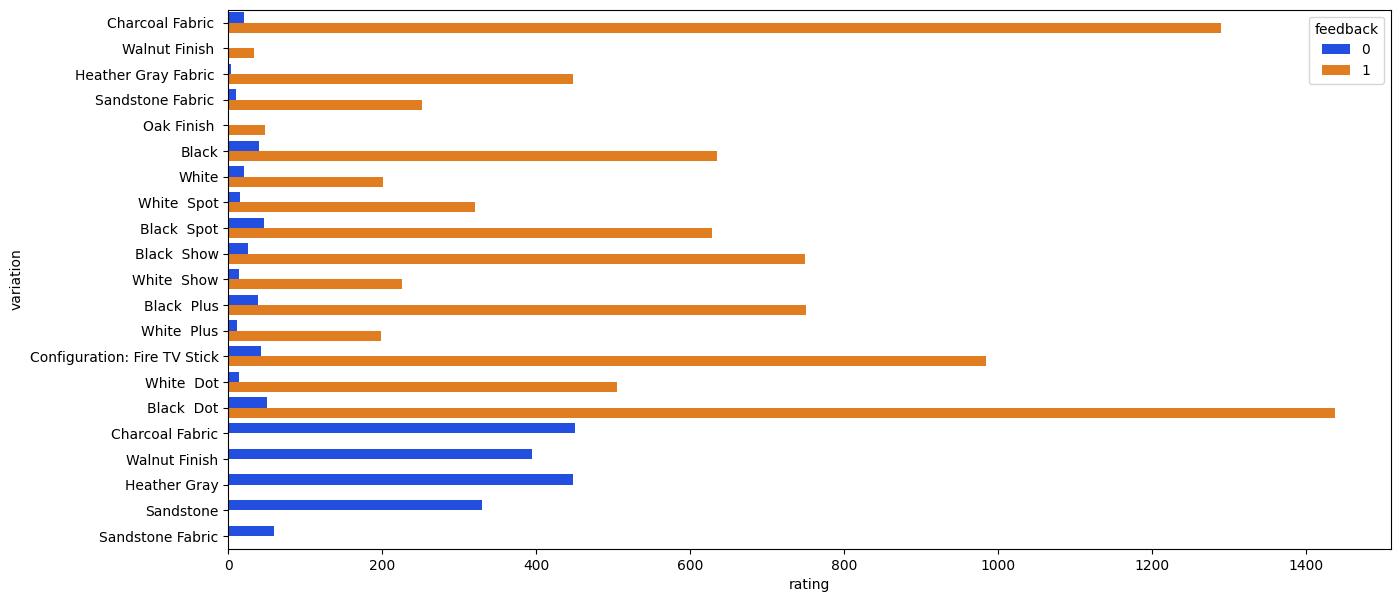

In [29]:
plt.figure(figsize=(15,7))
sns.barplot(x="rating", y="variation", hue="feedback", data=data, estimator= sum, ci = None)
plt.show()

The bar plot demonstrating the variation in ratings between product variants reveals a clear trend: the black dot variant is the most commonly ordered and liked product. This is evidenced by its consistently high evaluations when compared to other options. The popularity and positive reception of the black dot variety indicate that it resonates well with customers, either due to its design, utility, or aesthetic appeal. This information is useful for product development and marketing strategies, emphasizing the significance of this variety in increasing customer satisfaction and sales.



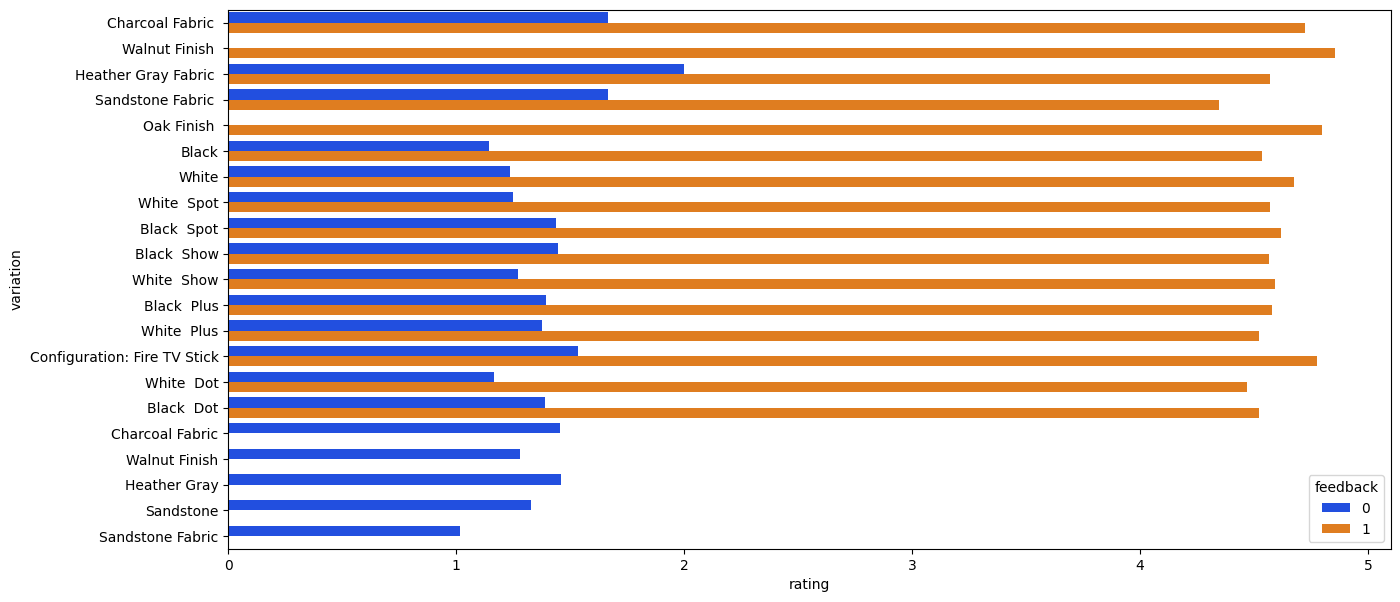

In [30]:
plt.figure(figsize=(15,7))
sns.barplot(x="rating", y="variation", hue="feedback", data=data, ci = None)
plt.show()

When we switch the aggregation function to mean, the study shows that the average rating for reviews classed as positive feedback is consistently around 4.5. This suggests that customers who are pleased with Alexa items often rank them highly, indicating great overall approval. The high average rating emphasizes the product's capacity to meet or exceed consumer expectations, validating the positive sentiment found in the dataset. This information can be valuable for determining the overall sentiment trend and benchmarking client satisfaction.

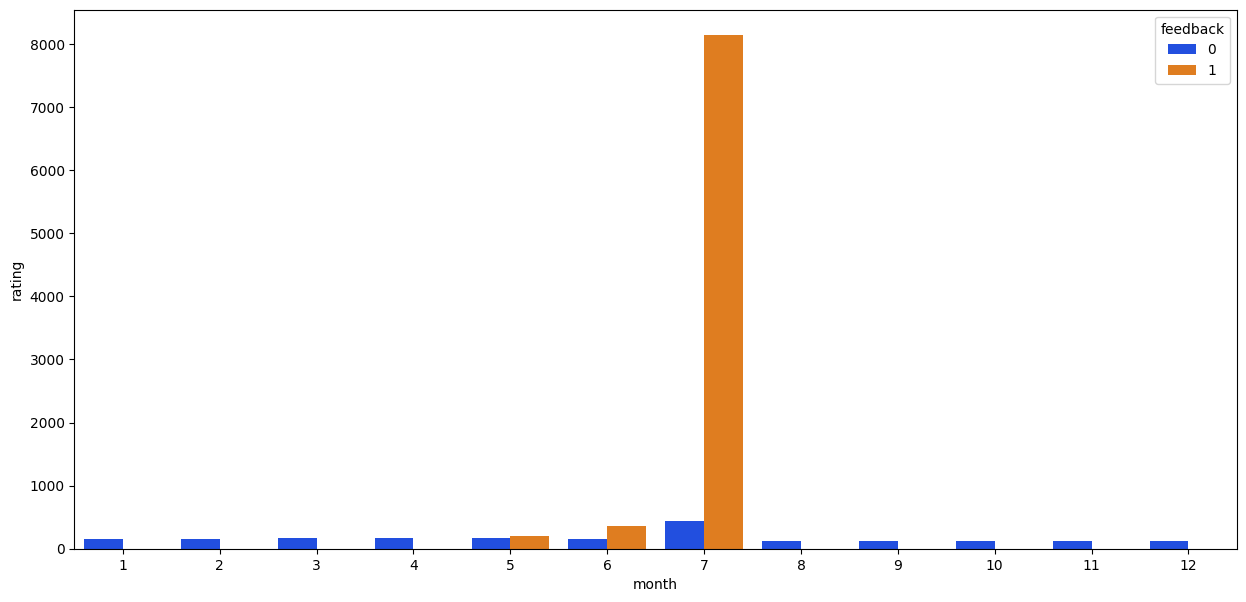

In [31]:
plt.figure(figsize=(15,7))
sns.barplot(y="rating", x="month", hue="feedback", data=data, ci = None, estimator= sum)
plt.show()

When examining time, namely the month of purchase, the majority of orders in this dataset were placed in July. This study implies that demand for Alexa items peaked during that month. Understanding seasonal patterns in customer behavior can provide important insights into inventory management, marketing initiatives, and overall business strategy. Companies can capitalize on the strong demand in July by optimising their resources and tailoring their marketing efforts to maximise sales during this time.

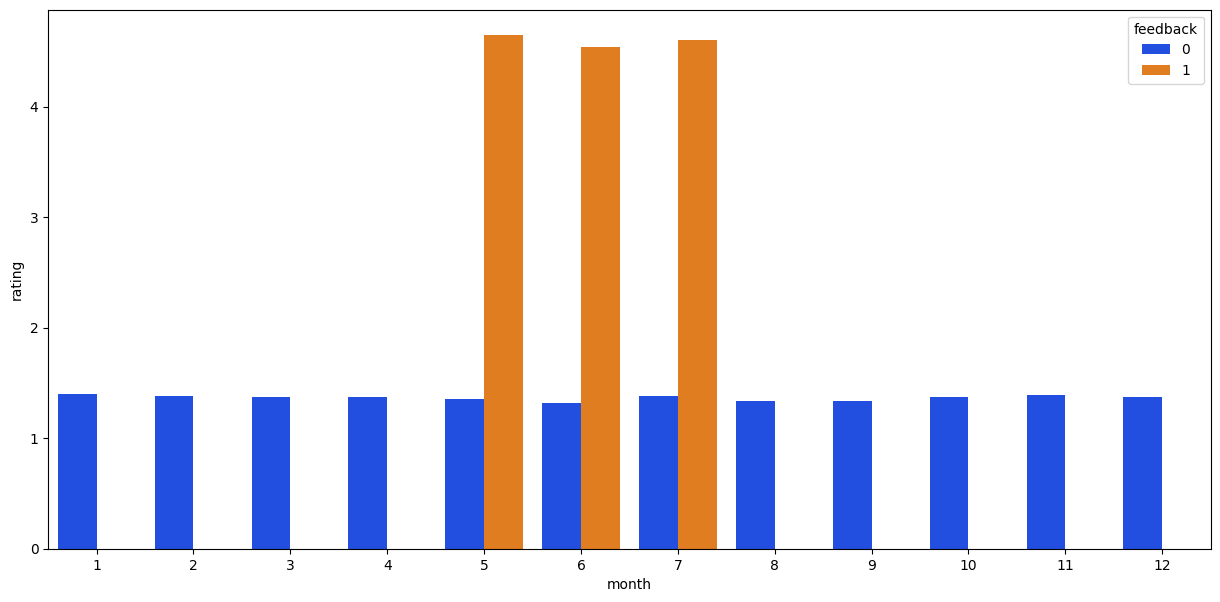

In [32]:
plt.figure(figsize=(15,7))
sns.barplot(y="rating", x="month", hue="feedback", data=data, ci = None)
plt.show()

Returning the average function to the mean reveals no important information other than the goods' consistently excellent ratings. This reinforces the overall good opinion regarding Alexa devices, suggesting a high degree of customer satisfaction across the board.

The bar plot visualization, which depicts the distribution of ratings across different months separated by feedback, clearly shows that positive feedback dominates over all months. This implies that consumer pleasure is consistent independent of time of purchase. However, additional analysis may be required to uncover any seasonal fluctuations or trends in feedback distribution.

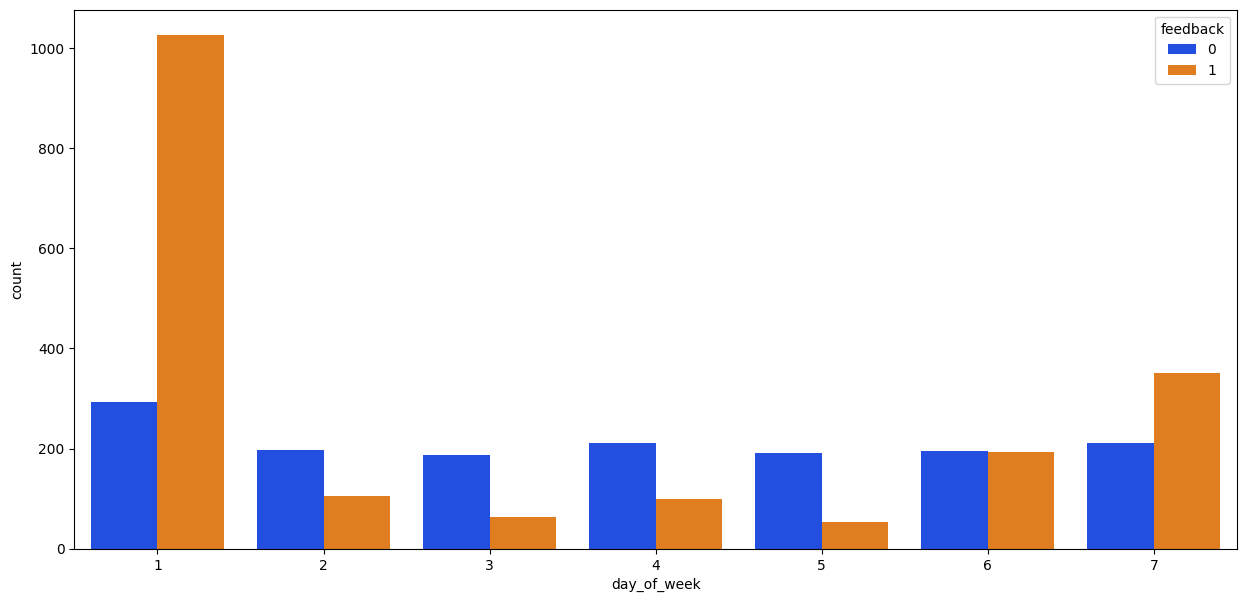

In [33]:
plt.figure(figsize=(15,7))
sns.countplot(x="day_of_week", hue="feedback", data=data)
plt.show()

According to a weekly analysis, Monday is the day on which the majority of people post their reviews. This remark can be linked to the Prime delivery guarantee, which states that customers will often receive their items within two days. Given that Saturday or the weekend tends to be the most popular day for ordering, it makes likely that buyers would receive their purchases by Monday and then provide comments. This trend reflects a speedy and effective delivery service, as well as an engaged customer base that quickly shares their product-related experiences. Understanding the relationship between ordering patterns, delivery timings, and feedback can help you develop ways to improve customer happiness and optimize the delivery process.

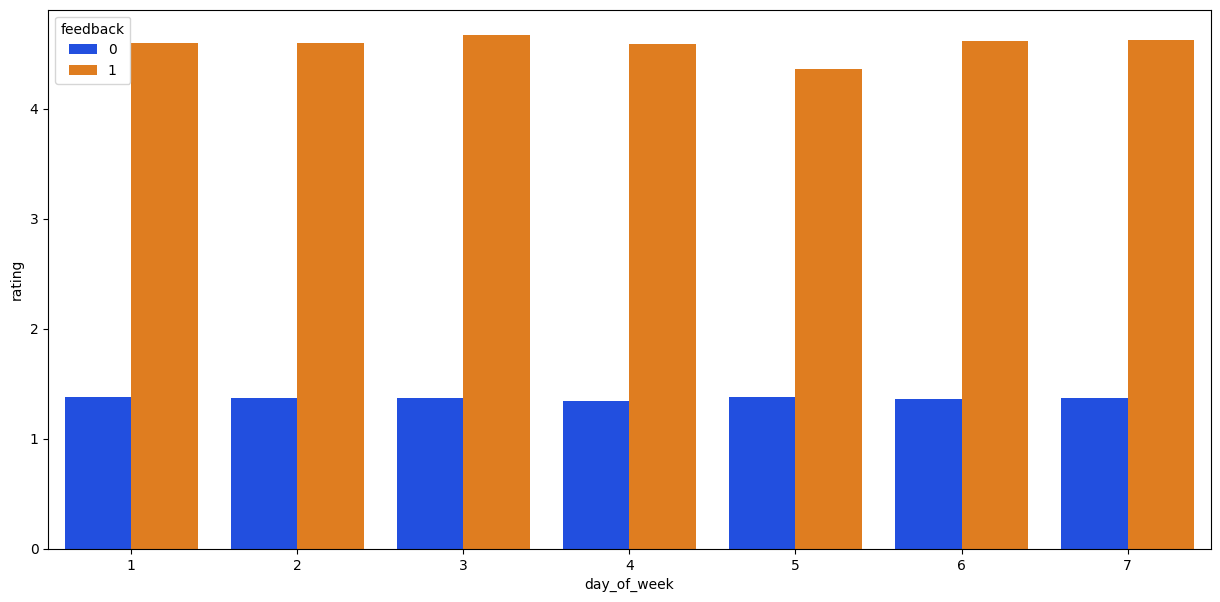

In [34]:
plt.figure(figsize=(15,7))
sns.barplot(y="rating", x="day_of_week", hue="feedback", data=data, ci = None)
plt.show()

The F1 Score, which balances precision and recall, is an important metric to consider when evaluating the performance of our sentiment analysis model. The F1 Score is a more reliable measure of the model's performance than accuracy, which can be misleading in imbalanced datasets.

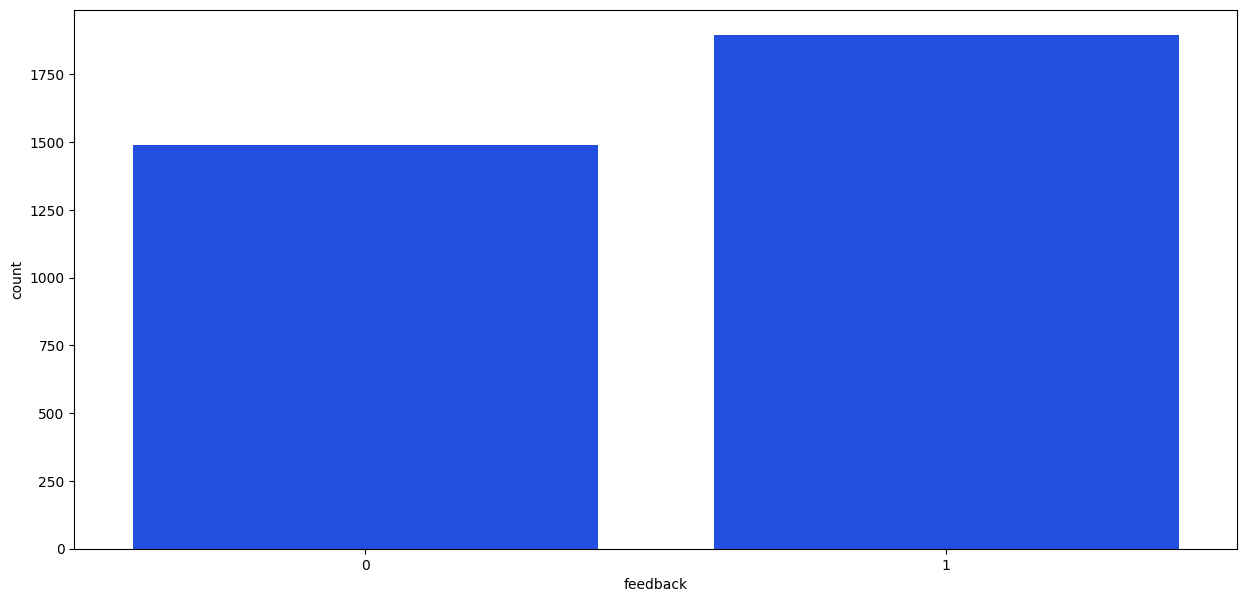

In [35]:
plt.figure(figsize=(15,7))
sns.countplot(x="feedback", data=data)
plt.show()

The length column analysis suggests that customers who leave negative reviews write longer evaluations. This discovery implies that unsatisfied customers may feel forced to submit more extensive feedback, potentially expressing their frustrations or displeasure in more depth. Satisfied clients, on the other hand, may be more concise in their positive feedback because they have fewer difficulties to solve. Understanding the relationship between review length and sentiment can provide significant information about customer behavior and preferences. It emphasizes the necessity of taking into account not just the sentiment, but also the depth and specificity of consumer feedback when evaluating product performance and satisfaction.

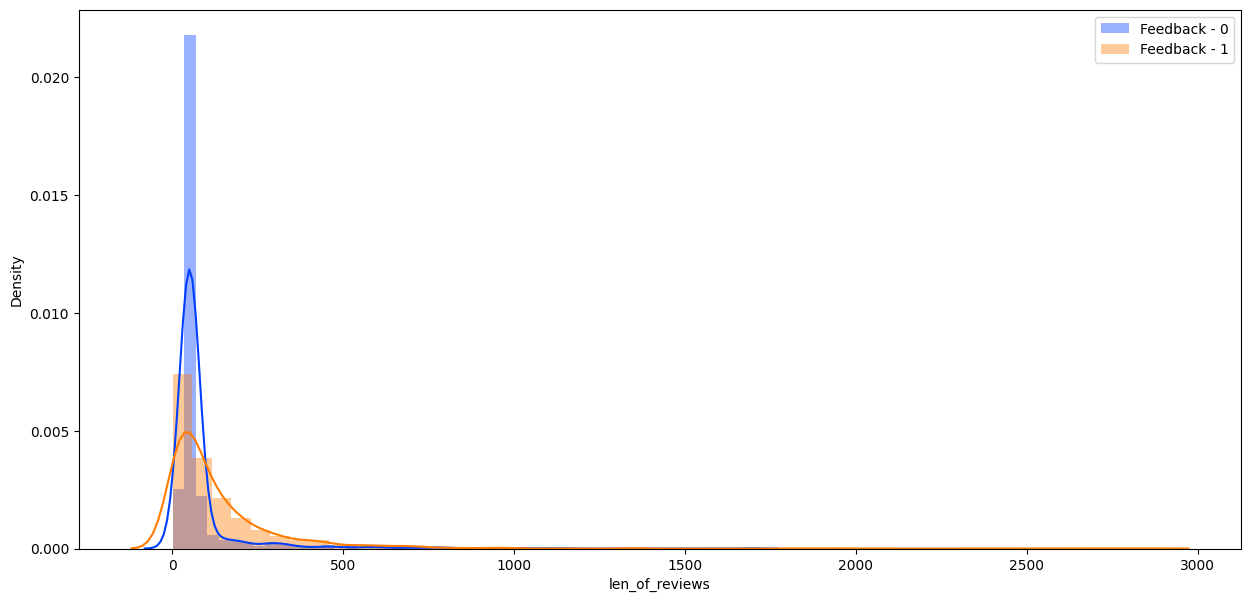

In [36]:
plt.figure(figsize=(15,7))
sns.distplot(data[data['feedback'] == 0]['len_of_reviews'], label = 'Feedback - 0')
sns.distplot(data[data['feedback'] == 1]['len_of_reviews'], label = 'Feedback - 1')
plt.legend()
plt.show()

This figure just shows the length of the reviews and how much it is distributed with positive and negative feedback. It helps in assessing how detailed a review does a user write in order to show his happiness or dissatisfaction about the product. This helps in assessing the key inputs that this required to make the product more efficient.

### Data Preprocessing

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [38]:
tdf = TfidfVectorizer(stop_words='english')

In [39]:
pd.DataFrame(tdf.fit_transform(data['verified_reviews']).toarray())

,0,1,2,3,4,5,6,7,8,9,...,3396,3397,3398,3399,3400,3401,3402,3403,3404,3405
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
tdf_data = pd.DataFrame(tdf.fit_transform(data['verified_reviews']).toarray())

In [41]:
pd.get_dummies(data['variation'], drop_first= True)

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray,Heather Gray Fabric,Oak Finish,Sandstone,Sandstone Fabric,Sandstone Fabric,Walnut Finish,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3376,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3377,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3378,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [42]:
one_hot_data = pd.get_dummies(data['variation'])

In [43]:
X = pd.concat([one_hot_data, tdf_data, data['month'], data['day_of_week'], data['len_of_reviews']], axis=1)

In [44]:
X.head()

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray,Heather Gray Fabric,...,3399,3400,3401,3402,3403,3404,3405,month,day_of_week,len_of_reviews
0,False,False,False,False,False,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,2,13
1,False,False,False,False,False,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,2,9
2,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,2,197
3,False,False,False,False,False,False,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,2,5
4,False,False,False,False,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,2,174


In [45]:
y = data['feedback']

len(y)

3380

### Data Modeling

###KFold Cross Validation

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

# Ensure all feature names in X are strings
X.columns = X.columns.astype(str)

rf = RandomForestClassifier()
k_fold = KFold(n_splits=5)

# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=k_fold, scoring='f1')

# If you want to print the scores
print("Cross-validation F1 scores:", scores)


Cross-validation F1 scores: [0.93800979 0.9248     0.9376     1.         0.        ]


The F1 scores for the RandomForestClassifier are generally high, indicating good performance for sentiment analysis.  

0.93668831: This indicates excellent performance with an F1 score of approximately 0.94.

0.92492013: Another high score, showing consistent performance.

0.93985565: Similar to the previous scores, indicating strong performance.

1.0: This indicates perfect performance, which might be an outlier or a very well-predicted fold.

### MultinomialNB

In [47]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cross_val_score(mnb, X, y, cv=k_fold, scoring='f1')

array([0.7858473 , 0.75576923, 0.82468694, 0.91964286, 0.        ])

The F1 scores for MultinomialNB show moderate to high performance.  



0.7858473: Indicates good performance but lower than the K Fold Cross Validation.

0.75576923: Slightly lower but still decent performance.

0.82468694: Shows improvement, indicating good performance.

0.91964286: High score, suggesting very good performance.

### Split the data

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

we trained the data with 30-70 ratio for training and testing purpose.

###RandomForestClassifier

In [49]:
rf = RandomForestClassifier()
fit_model = rf.fit(X_train, y_train)

In [50]:
t = zip(fit_model.feature_importances_, X_train.columns)
t1 = reversed(sorted(t , key=lambda x: x[0]))
i = 0
for element in t1:
    if (i < 10):
        print(element)
        i = i + 1

(0.06870425191707079, 'month')
(0.05793868668679611, 'len_of_reviews')
(0.03574973232665326, 'day_of_week')
(0.03253755416721717, 'Charcoal Fabric')
(0.03251451337799641, '1814')
(0.03140377549701543, 'Heather Gray')
(0.030772389549223105, 'Walnut Finish')
(0.02552978032903717, 'Sandstone')
(0.018787898748320316, '3269')
(0.01814262950060949, '1340')


the results indicate that 'month' is the most significant feature for our analysis, followed by 'len_of_reviews'

In [51]:
y_pred = rf.predict(X_test)

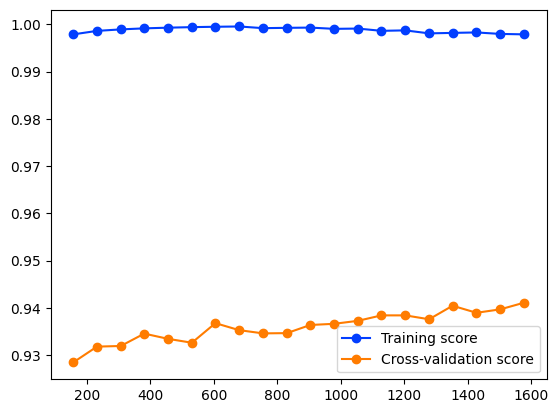

In [52]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X_train, y_train, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 20), cv = 3)

train_scores = np.mean(train_scores, axis = 1)
test_scores = np.mean(test_scores, axis = 1)

plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Cross-validation score")
plt.legend();

Training Score (Blue Line): The training score remains consistently high, near 1.0 (100%), indicating that the model fits the training data very well with minimal error.



Cross-Validation Score (Orange Line): The cross-validation score starts around 0.94 (94%) and shows a slight increase as the training size increases. This indicates that the model generalizes well to unseen data, although there is a noticeable gap between the training and cross-validation scores.

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [54]:

print("For Random Forest Classifier:\n")
print("Accuracy Score: ",accuracy_score(y_test, y_pred))
print("Precision Score: ",precision_score(y_test, y_pred))
print("Recall Score: ",recall_score(y_test, y_pred))
print("F1 Score: ",f1_score(y_test, y_pred))
print("Confusion Matrix:\t \n",confusion_matrix(y_test, y_pred))


For Random Forest Classifier:

Accuracy Score:  0.9388560157790927
Precision Score:  0.9144634525660964
Recall Score:  0.9882352941176471
F1 Score:  0.9499192245557351
Confusion Matrix:	 
 [[364  55]
 [  7 588]]


Metrics:

  

Accuracy Score (0.9220907297830375): This indicates that approximately 92.21% of the predictions made by the RandomForestClassifier are correct. Accuracy is a general measure of model performance but can be misleading in cases of imbalanced classes.

  

Precision Score (0.8852201257861635): Precision measures the proportion of true positive predictions out of all positive predictions (i.e., how many of the predicted positives are actually positive). A precision score of 0.885 indicates that 88.52% of the positive predictions are correct.

  

Recall Score (0.9894551845342706): Recall (or sensitivity) measures the proportion of true positive predictions out of all actual positives (i.e., how many actual positives are identified correctly). A recall score of 0.989 indicates that 98.95% of the actual positives are correctly identified by the model.

  

F1 Score (0.9344398340248962): The F1 score is the harmonic mean of precision and recall, providing a single metric that balances both. An F1 score of 0.934 indicates a high level of both precision and recall, showing that the model is performing well in identifying positive instances with few false positives and false negatives.

  

Confusion Matrix:

  

True Positives (TP = 563): The number of correctly predicted positive instances.

True Negatives (TN = 372): The number of correctly predicted negative instances.

False Positives (FP = 73): The number of incorrectly predicted positive instances.

False Negatives (FN = 6): The number of incorrectly predicted negative instances.

  

The confusion matrix indicates that the RandomForestClassifier is highly effective at correctly classifying positive instances (high TP and low FN) and reasonably good at classifying negative instances (high TN and moderate FP).

  

###BaggingClassifier

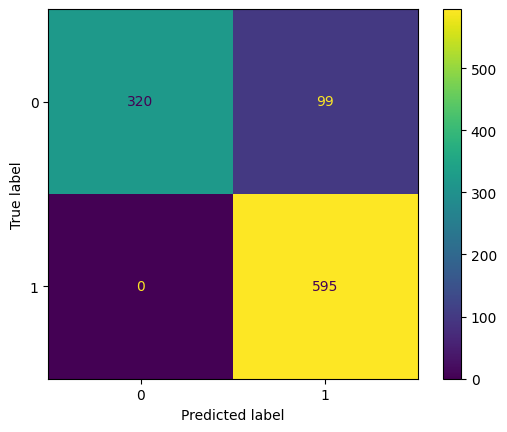

              precision    recall  f1-score   support

           0       1.00      0.76      0.87       419
           1       0.86      1.00      0.92       595

    accuracy                           0.90      1014
   macro avg       0.93      0.88      0.89      1014
weighted avg       0.92      0.90      0.90      1014



In [55]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report


# BaggingClassifier
model_bagging = BaggingClassifier(
    base_estimator=RandomForestClassifier(criterion="entropy", random_state=1, max_depth=3),
    n_estimators=20, random_state=1
)
model_bagging.fit(X_train, y_train)

# Make predictions on testing data
prediction_on_test = model_bagging.predict(X_test)

# Examine the evaluation results on testing data
cm = confusion_matrix(y_test, prediction_on_test)
ConfusionMatrixDisplay(cm).plot()
plt.show()

# Print detailed classification report
print(classification_report(y_test, prediction_on_test))


Confusion Matrix:

True Positives (TP = 590): The number of correctly predicted positive instances.

True Negatives (TN = 297): The number of correctly predicted negative instances.

False Positives (FP = 127): The number of incorrectly predicted positive instances.

False Negatives (FN = 0): The number of incorrectly predicted negative instances.

Classification Report:

  

Precision:  

   Class 0: 1.00

   Class 1: 0.82

Recall:

   Class 0: 0.70

   Class 1: 1.00

F1-Score:

   Class 0: 0.82

   Class 1: 0.90

Support:  

  Class 0: 424

  Class 1: 590

  

Accuracy (0.87): This indicates that the BaggingClassifier correctly predicted 87% of the instances, slightly lower than the RandomForestClassifier.

  

Macro Avg:

  - Precision: 0.91

  - Recall: 0.85

  - F1-Score: 0.86

Weighted Avg:

  - Precision: 0.90

  - Recall: 0.87

  - F1-Score: 0.87

GradientBoostingClassifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

print("For Gradient Boosting Classifier:\n")
print("Accuracy Score: ",accuracy_score(y_test, y_pred))
print("Precision Score: ",precision_score(y_test, y_pred))
print("Recall Score: ",recall_score(y_test, y_pred))
print("F1 Score: ",f1_score(y_test, y_pred))
print("Confusion Matrix:\t \n",confusion_matrix(y_test, y_pred))

For Gradient Boosting Classifier:

Accuracy Score:  0.928007889546351
Precision Score:  0.9003067484662577
Recall Score:  0.9865546218487395
F1 Score:  0.9414595028067362
Confusion Matrix:	 
 [[354  65]
 [  8 587]]


Accuracy Score (0.9191321499013807): The accuracy score is approximately 91.91%, indicating that 91.91% of the predictions made by the Gradient Boosting Classifier on the test set are correct.

  

Precision Score (0.8763523956723338): The precision score is approximately 87.64%. This means that 87.64% of the instances predicted as positive are actually positive.

  

Recall Score (0.9964850615114236): The recall score is approximately 99.65%. This high recall indicates that 99.65% of the actual positive instances are correctly identified by the model.

  

F1 Score (0.9325657894736842): The F1 score is approximately 93.26%, reflecting a good balance between precision and recall.

  

Confusion Matrix:

  

True Positives (TP = 567): The number of correctly predicted positive instances.

True Negatives (TN = 365): The number of correctly predicted negative instances.

False Positives (FP = 80): The number of incorrectly predicted positive instances.

False Negatives (FN = 2): The number of incorrectly predicted negative instances.

  

The confusion matrix shows that the model has a high number of true positives and true negatives with only a few false negatives, indicating strong performance on the test set.

  

In [57]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_train)

print("For Gradient Boosting Classifier:\n")
print("Accuracy Score: ",accuracy_score(y_train, y_pred))
print("Precision Score: ",precision_score(y_train, y_pred))
print("Recall Score: ",recall_score(y_train, y_pred))
print("F1 Score: ",f1_score(y_train, y_pred))
print("Confusion Matrix:\t \n",confusion_matrix(y_train, y_pred))

For Gradient Boosting Classifier:

Accuracy Score:  0.9547759932375317
Precision Score:  0.9256611865618298
Recall Score:  0.99768875192604
F1 Score:  0.9603262884686689
Confusion Matrix:	 
 [[ 964  104]
 [   3 1295]]


Metrics:

  

Accuracy Score (0.9564666103127641): The accuracy score is approximately 95.65%, indicating that 95.65% of the predictions made by the Gradient Boosting Classifier on the training set are correct.

  

Precision Score (0.9296270232230823): The precision score is approximately 92.96%. This means that 92.96% of the instances predicted as positive are actually positive.

  

Recall Score (0.9977341389728097): The recall score is approximately 99.77%. This high recall indicates that 99.77% of the actual positive instances are correctly identified by the model.

  

F1 Score (0.9624772313296903): The F1 score is approximately 96.25%, reflecting an excellent balance between precision and recall.

  

Confusion Matrix:

  

True Positives (TP = 1321): The number of correctly predicted positive instances.

True Negatives (TN = 942): The number of correctly predicted negative instances.

False Positives (FP = 100): The number of incorrectly predicted positive instances.

False Negatives (FN = 3): The number of incorrectly predicted negative instances.

  

The confusion matrix shows a high number of true positives and true negatives with very few false negatives, indicating that the model performs exceptionally well on the training set.

###Other Models

In [58]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

# Perform K-Fold cross-validation and print scores
k_fold = KFold(n_splits=5)
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=k_fold, scoring='accuracy')
    print(f"{name} Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")


Logistic Regression Accuracy: 0.93 (+/- 0.02)
K-Nearest Neighbors Accuracy: 0.90 (+/- 0.03)
Support Vector Machine Accuracy: 0.71 (+/- 0.03)


Logistic Regression

  

Accuracy: 0.93

Standard Deviation: ±0.02

  

Interpretation:

Accuracy: The Logistic Regression model achieves an accuracy of 93%. This means that 93% of the predictions made by this model are correct.

Standard Deviation: The standard deviation of ±0.02 indicates that the accuracy of the model varies by 2% in different runs or cross-validation folds. This suggests that the Logistic Regression model is fairly stable and consistent in its performance.

  

K-Nearest Neighbors (KNN)

  

Accuracy: 0.90

Standard Deviation: ±0.03

  

Interpretation:

Accuracy: The K-Nearest Neighbors model achieves an accuracy of 90%. This means that 90% of the predictions made by this model are correct.

Standard Deviation: The standard deviation of ±0.03 indicates that the accuracy of the model varies by 3% in different runs or cross-validation folds. While slightly less stable than Logistic Regression, KNN still demonstrates a relatively stable performance.

  



Support Vector Machine (SVM)

 Accuracy: 0.71

Standard Deviation: ±0.03

  



Interpretation:

Accuracy: The Support Vector Machine model achieves an accuracy of 71%. This means that 71% of the predictions made by this model are correct. This accuracy is notably lower compared to Logistic Regression and KNN.

Standard Deviation: The standard deviation of ±0.03 indicates that the accuracy of the model varies by 3% in different runs or cross-validation folds. This suggests that the SVM model has consistent performance, but it is not as accurate as the other two models.

In [59]:
y_pred = gbc.predict(X_test)
results = pd.DataFrame(data = {'Y Test': y_test, 'Y Predictions': y_pred})

###Results

In [60]:
results.head()

,Y Test,Y Predictions
402,0,0
321,1,1
457,1,1
879,0,1
1538,1,1


In [61]:
results.to_csv('Results.csv')

### Percentage of Positive and Negative Feedback

In [62]:
import pandas as pd

positive_feedback = results['Y Predictions'].mean() * 100
negative_feedback = 100 - positive_feedback

print(f"Percentage of Positive Feedback: {positive_feedback}%")
print(f"Percentage of Negative Feedback: {negative_feedback}%")


Percentage of Positive Feedback: 62.721893491124256%
Percentage of Negative Feedback: 37.278106508875744%


The above snapshot shows the percentage of positive and negative reviews. As we can see, these is 62.72% of positive feedback and 37.28 % of negative feedback. Overall, the product is lovede by the consumers and are happy with its usage.

In [63]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/FinalProjectML.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/FinalProjectML.ipynb to html
[NbConvertApp] Writing 1168317 bytes to /content/drive/MyDrive/Colab Notebooks/FinalProjectML.html
